In [27]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
# nltk.download('stopwords');
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import yellowbrick
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction import text 

In [28]:
# import the dataset
def get_data(file1,file2, file3, path = 'C:/Gradient Boost/')->pd.DataFrame:
    """
    gets input csv file and reads it into a pandas dataframe
    
    returns pandas dataframe
    
    """
    df1=pd.read_csv(path + file1,encoding='latin-1')
    df1['State'] = 'Abuja'
    df2=pd.read_csv(path + file2,encoding='latin-1')
    df2['State'] = 'Lagos'
    df3=pd.read_csv(path + file3,encoding='latin-1')
    df3['State'] = 'Kaduna'
    df=pd.concat([df1, df2, df3])
    return df


In [29]:
def explore_data(df):
    """
    Explore input data frame.
    
    Returns None
    """
    print(df.shape) # Shape of the data frame
    print(df.columns) # Columns in the data frame
    print(f"number of unique labels, {df['Rating'].nunique()}") # number of labels

In [30]:
#  word_tokenize to all records, making a new column in our DataFrame strip out non alphanumeric words/characters (such as numbers and punctuation) using .isalpha.
def identify_tokens(df):
    review = df['Review_Text']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [31]:
# Stemming reduces related words to a common stem. It is an optional process step, and it is useful to test accuracy with and without stemming.
def stem_list(df):
    my_list = df['words']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

In [32]:
# Removing stop words
def remove_stops(df):
    my_list = df['words']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

In [33]:
# Rejoin words
def rejoin_words(df):
    my_list = df['stem_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

In [34]:
# Using TextBlob for Polarity
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText


In [35]:
# Visualoze Top Tokens
def visualize_top_tokens(df, state):
    plt.figure(figsize=(20, 10))
    stop_words2 = text.ENGLISH_STOP_WORDS.union(['http', 'https'])
    vectorizer = CountVectorizer(stop_words=stop_words2)
    corpus=[]
    new_df = df[df['State'] == state]
    new= new_df['Review_Text'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    tweets = corpus
    docs = vectorizer.fit_transform(tweets)
    features = vectorizer.get_feature_names()
    visualizer = FreqDistVisualizer(features=features)
    visualizer.fit(docs)
    return visualizer.poof()

In [36]:
df = get_data('/Abuja Hotels Cleaned.txt', '/Lagos Hotels Cleaned.txt', '/Kaduna Hotels Cleaned.txt')
df

,Unnamed: 0,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
0,0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....",13000.0,7.4,Abuja
1,1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,5000.0,7.3,Abuja
2,2,New Rendezvous Hotel,https://hotels.ng/hotel/36783-new-rendezvous-h...,"Wuse 6, Abuja - 21, Plot 188, Makeni Street, Z...",https://hotels.ng/hotels-in-abuja/wuse-6,Wuse 6,"Very clean room, ventilation was not too good,...",5000.0,6.9,Abuja
3,3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,8400.0,6.8,Abuja
4,4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,9000.0,7.4,Abuja
...,...,...,...,...,...,...,...,...,...,...
20,61,Silversand Hotel,https://hotels.ng/hotel/85725-silversand-hotel...,"Ungwar Sarki, Kaduna - 19,Katuru Road,Off Isa ...",https://hotels.ng/hotels-in-kaduna/ungwar-sarki,Ungwar Sarki,The food at the hotel was very nice and afford...,13680.0,6.8,Kaduna
21,79,Kabir Gymnasium,https://hotels.ng/hotel/98733-kabir-gymnasium-...,"Kaduna, Kaduna - 12 Abdulrahman Okene Road, Op...",https://hotels.ng/hotels-in-kaduna/kaduna,Kaduna,I made use of the hotel while on a personal tr...,7000.0,6.8,Kaduna
22,83,Maharaja Hotel,https://hotels.ng/hotel/25937-maharaja-hotel-k...,"Zaria, Kaduna - 1, Independence Way, Kaduna Ni...",https://hotels.ng/hotels-in-kaduna/zaria,Zaria,The hotel is a good place to be because I enjo...,9600.0,6.8,Kaduna
23,116,Excel Inn,https://hotels.ng/hotel/43881-excel-inn-akwa-ibom,"Kaduna North, Kaduna - NN23 Constitution Road",https://hotels.ng/hotels-in-kaduna/kaduna-north,Kaduna North,\n\nI enjoyed my stay at the hotel. It is very...,5610.0,6.8,Kaduna


In [37]:
explore_data(df)

(417, 10)
Index(['Unnamed: 0', 'Hotel_Title', 'Title_URL', 'Address', 'Address_URL',
       'City', 'Review_Text', 'Price', 'Rating', 'State'],
      dtype='object')
number of unique labels, 20


In [61]:
# convert all text to lower case.
df['Review_Text'] = df['Review_Text'].str.lower()

# identify tokens
df['words'] = df.apply(identify_tokens, axis=1)

# stem words
df['stemmed_words'] = df.apply(stem_list, axis=1)

# Remove stop words
df['stem_meaningful'] = df.apply(remove_stops, axis=1)

# rejoin words
df['processed'] = df.apply(rejoin_words, axis=1)

# remove nan rows
df = df[~df['Review_Text'].isnull()]

# Rendering Polarity
df['Review_Text'] = preprocess(df['Review_Text'])
df['polarity'] = df['Review_Text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['Review_Text'].astype(str).apply(len)
df['word_count'] = df['Review_Text'].apply(lambda x: len(str(x).split()))

<ipython-input-34-458fc61ecad2>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewText = ReviewText.str.replace("(<br/>)", "")
<ipython-input-34-458fc61ecad2>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
<ipython-input-34-458fc61ecad2>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewText = ReviewText.str.replace('(&amp)', '')
<ipython-input-34-458fc61ecad2>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewText = ReviewText.str.replace('(&gt)', '')
<ipython-input-34-458fc61ecad2>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  ReviewText = ReviewText.str.replace('(&lt)', '')
<ipython-input-34-458fc61ecad2>:8: FutureWarning: The default value of regex will cha

### Visualize Top Tokens for Each State

Abuja


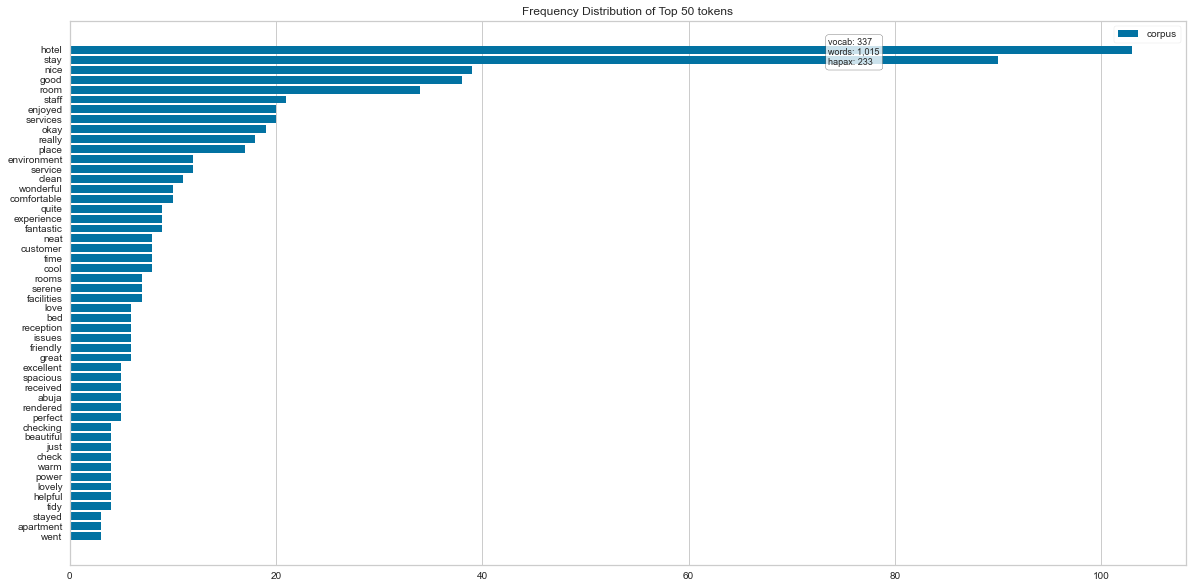

Lagos


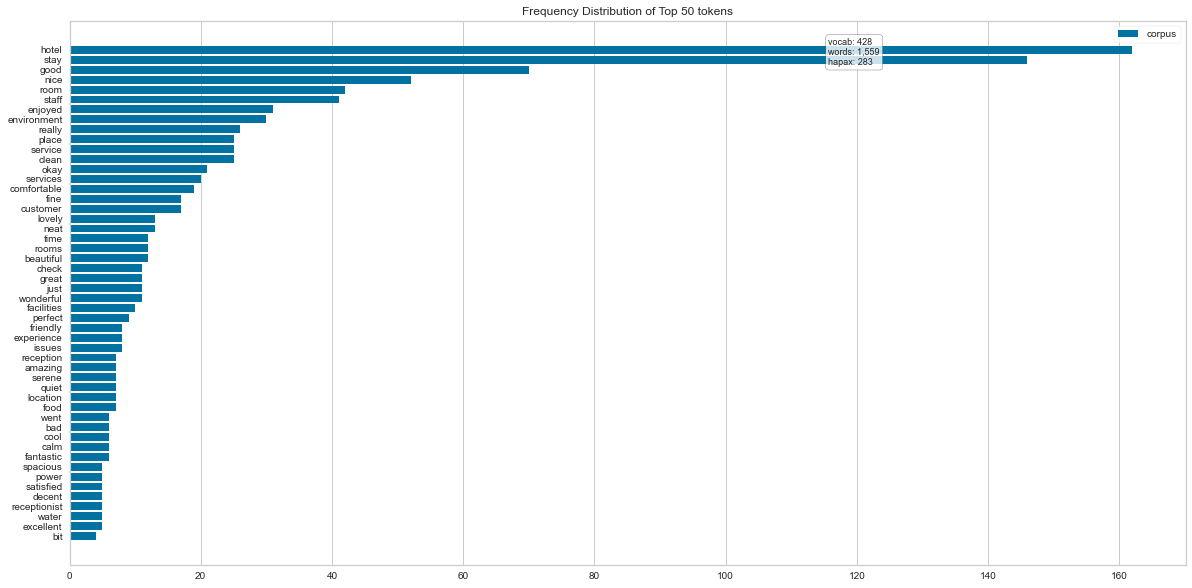

Kaduna


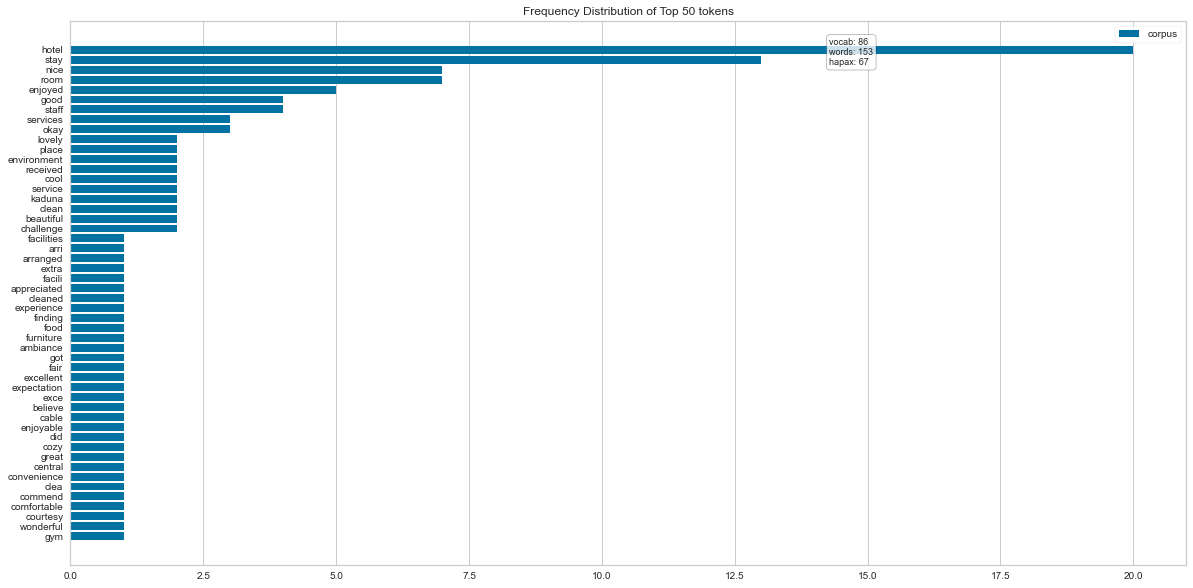

(None,
 None,
 None,
 <matplotlib.axes._subplots.AxesSubplot at 0x118d1b4f4c0>)

In [39]:
print('Abuja'), visualize_top_tokens(df, 'Abuja'),  print('Lagos'), visualize_top_tokens(df, 'Lagos'), print('Kaduna'), visualize_top_tokens(df, 'Kaduna')

## Polarity
### Individuals mixed Negative Review Texts with Positive ones thereby resulting in texts having a Neutral Polarity 
* For Example, View the Texts below;

In [73]:
print(df.loc[16, 'Review_Text'].tolist())
print()
print(df.loc[36, 'Review_Text'].tolist())

['the water heater was in a terrible state,  the hotel people were clueless about how to fix...', 'my stay was alright. i had no issues at all....', 'my stay was okay at the hotel. the environment was cool and serene. my room was quite clea...']

['it was a good stay, service was perfect....', 'the hotel is not well kept. we had to demand for our room to be changed after we noticed t...']


### Most Negative and Neutral Polarity were from which State?

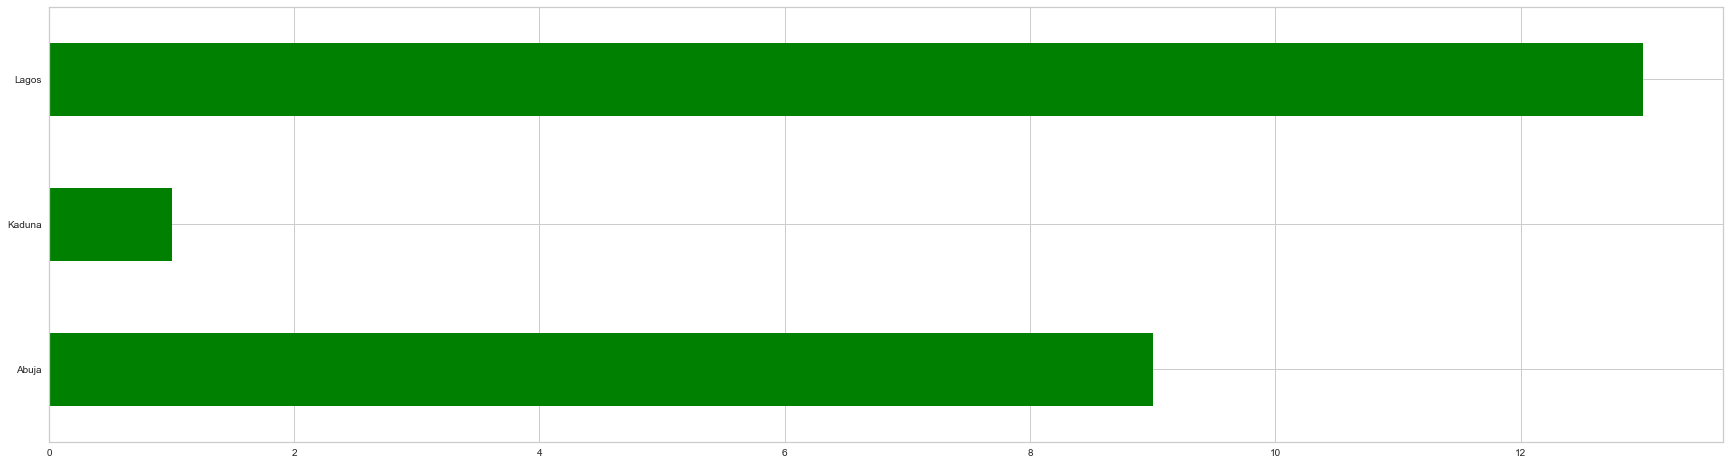

In [85]:
# Analysing Negative Words with Neutral words
plt.figure(figsize=(30, 8))
neg_polarity = df[(df['polarity']<=-0.0)]
neg_polarity['State'].value_counts()
neg_polarity.State.value_counts().sort_index(ascending=True).plot(kind='barh', color= 'Green')

### What did most customers who visited Lagos Hotels complain about?

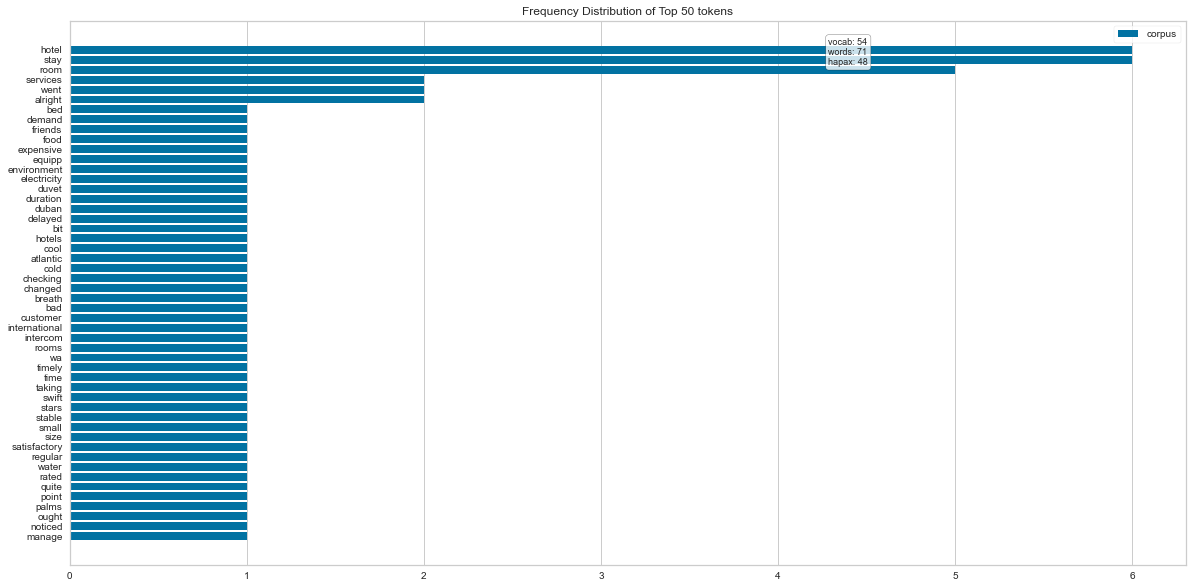

In [90]:
visualize_top_tokens(neg_polarity, 'Lagos')

### Analysing Rooms one of the top reasons why most customers within Lagos complain

In [110]:
# Searching for where there are True bools for Rooms
neg_polarity.apply(lambda row: row.astype(str).str.contains('room').any(), axis=1)
# Print the texts of these Indices
indices = [36, 69, 85, 101]
for value in indices:
    print(df.loc[value, 'Review_Text'].tolist())

['it was a good stay, service was perfect....', 'the hotel is not well kept. we had to demand for our room to be changed after we noticed t...']
['i liked the hotel and my stay there was good. the environment was serene and ambiance felt...', 'breath taking rooms and swift room services...']
['i had a nice stay at the hotel. the customer services and the facilities were quite okay. ...', 'there was no duvet and it was so cold.  also, there was no intercom in my room, that was s...']
["this isn't my first time at this hotel and it most certainly won't be my last. the service...", 'the room size was very small and i had to manage the room all through my stay, the bed was...']
